In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv(r'D:\FSDS\4th - REGRESSION PROJECT\RESUME PROJECT -- PRICE PREDICTION\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
print(df.columns)


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [6]:
df = df.drop(['Unnamed: 0', '4046', '4225', '4770', 'Date'], axis=1)

In [7]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
def get_average(df,column):
    '''
    Description: This function will return average value of the column

    Arguments:
    df: dataframe
    column: slected column

    Returns: column's average 
    '''
    return sum(df[column])/len(df)

In [9]:
def get_average_between_two_columns(df, column1, column2):
    '''
    Description: This function will calculate average between two columns

    Arguments: 
    df: dataframe
    column1: first column
    column2: second column

    Returns: sorted data for relation between column1 and column2
    '''

    # Get the unique values in column1
    unique_values = list(df[column1].unique())
    
    # List to store the average values
    averages = []

    # Loop through each unique value in column1
    for value in unique_values:
        # Subset the DataFrame for the current unique value
        subset = df[df[column1] == value]
        
        # Calculate the average for column2 in the subset
        column2_average = subset[column2].mean()
        
        # Append the result
        averages.append(column2_average)

    # Create a DataFrame with the results
    result_df = pd.DataFrame({'column1': unique_values, 'column2': averages})

    # Sort the DataFrame by column2 in descending order
    sorted_result_df = result_df.sort_values(by='column2', ascending=False)

    return sorted_result_df


In [10]:
df.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [11]:
def plot(data, xlabel, ylabel):
    '''
    Description: This function draws a bar plot.
    
    Arguments:
    data: DataFrame
    xlabel: label of the first column (string)
    ylabel: label of the second column (string)
    
    Returns:
    None
    '''
    
    plt.figure(figsize=(15, 5))    
    
    # Draw the bar plot
    sns.barplot(x=data[xlabel], y=data[ylabel], palette='rocket', hue=data[xlabel])  # Assign x to hue
    
    # Rotate x-axis labels if necessary
    plt.xticks(rotation=90)    
    
    # Labeling axes
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Title formatting
    plt.title(f'Average {ylabel} of Avocado According to {xlabel}')
    
    # Show the plot
    plt.show()


# def plot(data, xlabel, ylabel):
#     '''
#     Description: This function draws a bar plot.
    
#     Arguments:
#     data: DataFrame
#     xlabel: label of the first column (string)
#     ylabel: label of the second column (string)
    
#     Returns:
#     None
#     '''
    
#     # Clean column names (strip any spaces)
#     data.columns = data.columns.str.strip()
    
#     # Use x as hue to avoid the warning
#     plt.figure(figsize=(15, 5))
#     sns.barplot(x=data[xlabel], y=data[ylabel], palette='rocket', hue=data[xlabel])  # Assign x to hue
#     plt.xticks(rotation=90)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(f'Average {ylabel} of Avocado According to {xlabel}')
#     plt.show()


In [12]:
print(data1.columns)

NameError: name 'data1' is not defined

In [ ]:
data1 = get_average_between_two_columns(df, 'region', 'AveragePrice')

# Check the first few rows and column names to ensure correctness
print(data1.head())

# Now plot
plot(data1, 'region', 'AveragePrice')

In [ ]:
def get_average_between_two_columns(df, column1, column2):
    '''
    Description: This function will calculate the average between two columns.
    
    Arguments:
    df: DataFrame
    column1: first column (e.g., 'region')
    column2: second column (e.g., 'AveragePrice')
    
    Returns: DataFrame with the average of column2 for each unique value in column1
    '''
    unique_values = list(df[column1].unique())
    averages = []
    
    for value in unique_values:
        subset = df[df[column1] == value]
        column2_average = subset[column2].mean()
        averages.append(column2_average)

    result_df = pd.DataFrame({column1: unique_values, column2: averages})
    sorted_result_df = result_df.sort_values(by=column2, ascending=False)
    return sorted_result_df

def plot(data, xlabel, ylabel):
    '''
    Description: This function draws a bar plot.
    
    Arguments:
    data: DataFrame
    xlabel: label of the first column (string)
    ylabel: label of the second column (string)
    
    Returns:
    None
    '''
    
    # Clean column names (strip any spaces)
    data.columns = data.columns.str.strip()
    
    # Use x as hue to avoid the warning
    plt.figure(figsize=(15, 5))
    sns.barplot(x=data[xlabel], y=data[ylabel], palette='rocket', hue=data[xlabel])  # Assign x to hue
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Average {ylabel} of Avocado According to {xlabel}')
    plt.show()


# Example usage:
# Assuming your DataFrame 'df' has the columns 'region' and 'AveragePrice'
data1 = get_average_between_two_columns(df, 'region', 'AveragePrice')

# Check the first few rows and column names to ensure correctness
print(data1.head())

# Now plot
plot(data1, 'region', 'AveragePrice')


In [ ]:
print(data1['region'].iloc[-1], "is the region producing avocado with the lowest price")

In [ ]:
# Assuming df has a 'Total Volume' column
data2=get_average_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2['Total Volume'])
plt.title("Figure: Boxplot representing outlier column")
plt.show()


In [ ]:
# Filter for outliers where Total Volume > 10,000,000
outlier_region = data2[data2['Total Volume'] > 10000000]

# Sort by 'Total Volume' to get the largest outlier and print the region
outlier_region_sorted = outlier_region.sort_values(by='Total Volume', ascending=False)
print(outlier_region_sorted['region'].iloc[0], "is the outlier region with the highest Total Volume")


In [ ]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

In [ ]:
plot(data2, 'region', 'Total Volume')

In [ ]:
# Calculate average price per year
data3 = get_average_between_two_columns(df, 'year', 'AveragePrice')
# Now plot the average price per year
plot(data3, 'year', 'AveragePrice')  # Replace 'Price' with 'AveragePrice' since that's the column we computed


In [ ]:
# Calculate average price per year
data4 = get_average_between_two_columns(df, 'year', 'Total Volume')
# Now plot the average price per year
plot(data4, 'year', 'Total Volume')  # Replace 'Price' with 'AveragePrice' since that's the column we computed


In [13]:
# Convert 'region' to category and then map to codes
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

# Convert 'type' to category and then map to codes
df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [17]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [19]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
# split data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
print('training set: ' ,x_train.shape,'_',y_train.shape[0],'samples')
print('testing set: ' ,x_test.shape,'_',y_test.shape[0],'samples')

training set:  (12774, 8) _ 12774 samples
testing set:  (5475, 8) _ 5475 samples


In [23]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
test_pred = model.predict(x_test)
test_score = r2_score(y_test,test_pred)
print("The accuracy of testing dataset " ,test_score*100)

The accuracy of testing dataset  38.94980399701669


In [33]:
train_predit=model.predict(x_train)
train_score=r2_score(y_train,train_predit)
print("The accuracy of training dataset " , train_score*100)

The accuracy of training dataset  39.54085418060852


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Evaluate the model on training data
train_mae = mean_absolute_error(y_train, train_predit)
train_mse = mean_squared_error(y_train, train_predit)

# Evaluate the model on testing data
test_mae = mean_absolute_error(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

# Print the results
print(f"Training MAE: {train_mae:.2f}")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MAE: {test_mae:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

Training MAE: 0.24
Training MSE: 0.10
Testing MAE: 0.24
Testing MSE: 0.10


In [39]:
# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.15303235e-08 -2.74796750e-02  2.74797373e-02  2.74794812e-02
  2.74807227e-02  4.89000139e-01  3.51945074e-02  1.08456122e-04]
Intercept: -69.79561759664601


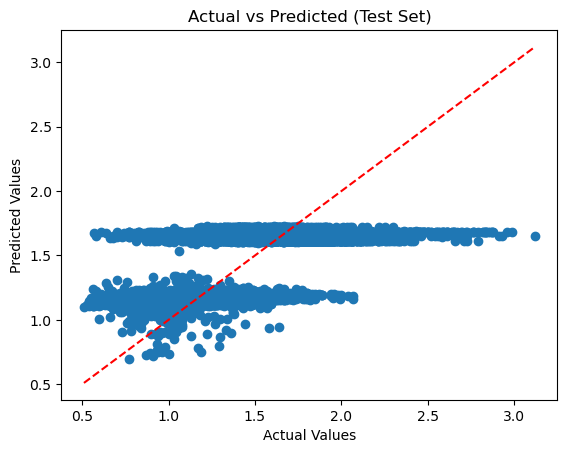

In [41]:

# Plot the actual vs predicted values for the test set
plt.scatter(y_test, test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.show()

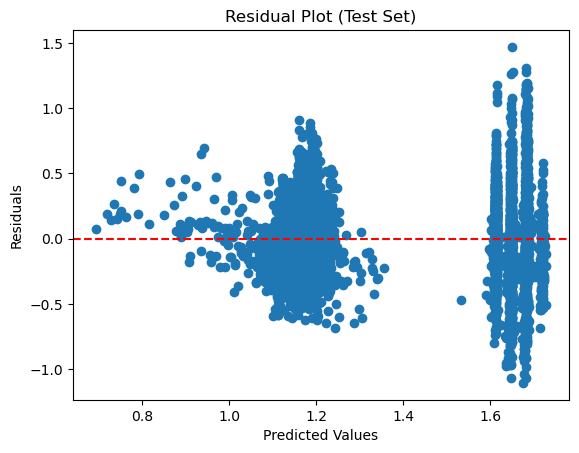

In [43]:
residuals = y_test - test_pred

# Plot the residuals
plt.scatter(test_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.show()

In [45]:
# Get the feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})

# Sort by the absolute value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

        Feature   Coefficient  Abs_Coefficient
5          type  4.890001e-01     4.890001e-01
6          year  3.519451e-02     3.519451e-02
4   XLarge Bags  2.748072e-02     2.748072e-02
2    Small Bags  2.747974e-02     2.747974e-02
1    Total Bags -2.747968e-02     2.747968e-02
3    Large Bags  2.747948e-02     2.747948e-02
7        region  1.084561e-04     1.084561e-04
0  Total Volume -1.153032e-08     1.153032e-08


In [53]:
# Assuming you have new data in a DataFrame `new_data`
new_predictions = model.predict(df)
print("Predictions on new data:", new_predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AveragePrice


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'linear_regression_model.pkl')

# Load the model later using joblib
loaded_model = joblib.load('linear_regression_model.pkl')

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Example data (replace with your own dataset)
X = # Your feature data
y = # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a scaler and a linear regression model
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)


SyntaxError: invalid syntax (2652877494.py, line 7)